In [1]:
%run -i sampler.py
i = 0

In [2]:
if i>0:
    sampler.cppn.close()
    tf.reset_default_graph()
# net_size = [64, 1]
# 6, 8, 8, 8]  ## must have as many elements as num_layers
# net_size = net_size[::-1]
# net_size = [32, 32, 16, 8, 4, 3]
# net_size = [32, 32, 32, 16, 4, 4]
# net_size = [32, 32, 32, 32, 32, 24, 16, 8, 4]

# net_size = [32, 32]
# net_size = np.tile(net_size, 5)

# net_size = [256, 256, 128, 64, 32, 16, 16, 8, 8, 4, 4, 3, 3, 9]
# net_size = [256, 64, 128, 32, 16, 8, 4]

# net_size = [128, 32, 32, 4, 4]  # (makes good pictures with tanh(x^5)
# net_size = [32, 128, 32, 4]
# net_size = np.multiply([32, 512, 64, 32, 32, 8], 0.5)
# net_size = [256, 32, 32, 32, 8, 4]  # (makes good pictures with tanh(x^5)
# net_size = [128, 32, 32, 32, 32, 16, 8, 4]
# net_size = [64, 8, 32, 32, 32, 3]
# net_size = [32, 32, 32, 32, 16, 8, 6]
# net_size = [64, 256, 64, 128, 64, 16, 8, 6]

# net_size = np.concatenate((np.tile([64, 32], 5), [6, 3]))
# a = 25
# b = 15
# c = 10
# d = 5
# net_size = np.tile([a, b], 2)
# net_size = np.append(net_size, [100])
# net_size = np.append(net_size, np.tile([c, d], 2))
# net_size = np.concatenate(([64], net_size))
# a = 16
# b = 8
# c = [a, b]
# net_size = [256, 128] + c + [128, 64] + c + [32, 16] + [4, 4]
# net_size = [128, 128, 128, 12, 12, 12, 12, 12, 12, 6, 6]

# total_neurons = 500
# num_layers = 20
# w = 0.5
# net_size = []
# for i in range(1, 20):
#     n = 500 / (i ** w) + 20*np.sin(i)**2 + 3
#     # n = i ** w + np.cos(i) + 3
#     # n = np.log10(i)
#     net_size.append(np.round(n))
# net_size = net_size / (np.sum(net_size) / total_neurons)
# net_size = [int(np.round(x)) for x in net_size]
# print(net_size)
seed = 12345678
seed = int(np.random.random()*1e5)
np.random.seed(seed=seed)

total_neurons = 200
num_layers = 5
omega =  3
alpha = 2
mu = -0.1

a = 26
# net_size = np.tile(16, 20)
# net_size = [20, a, a, 300, 3]
# net_size = np.append(net_size, [4])
# net_size = [i**2 for i in range(3,11)]
# net_size = np.append(net_size, [10, 5])
# net_size = [3,30, 300, 30, 3]
# net_size = np.tile(15, 10)
# net_size = [44, 32, 20, 20, 8]
# net_size = np.tile(100, 5)
# net_size = [32, 32, 128, 64, 64, 4, 16]
# net_size = [32, 32, 128, 64, 64, 4, 16]
# net_size = [32, 128, 32, 128, 32, 4]
# net_size = [32, 32, 32, 16, 16, 16, 16, 64, 4]

# net_size = [32, 32, 128, 64, 16, 16]
# net_size =[128, 96, 8, 64, 32, 16, 8, 8]
# net_size = [40 - 2*i*4 for i in range(0,5)]
# net_size = [40, 32, 24, 16, 4]
# net_size = [44, 32, 20, 20, 20, 20, 20, 8]
net_size = np.tile([32, 32, 8], 7)



print(net_size)

num_layers = len(net_size)
c_dim = 3
# img_null = np.zeros((1080, 1080))
img_null = None
sampler = Sampler(z_dim = 16, scale = 8, net_size = net_size, 
                  num_layers=num_layers, c_dim=c_dim, seed=seed, img=img_null)
i = 1
mgc = get_ipython().magic
mgc(u'matplotlib inline')
pylab.rcParams['figure.figsize'] = (10.0, 10.0)
i_r = 0

[32 32  8 32 32  8 32 32  8 32 32  8 32 32  8 32 32  8 32 32  8]
Instructions for updating:
Colocations handled automatically by placer.


## Random

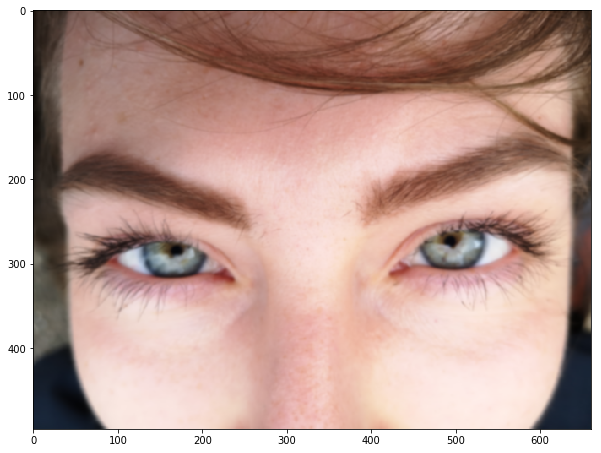

In [3]:
import scipy.ndimage
# img_path = '/home/skhajehabdollahi/Documents/cppn-tensorflow-master/anna_square.jpeg'
# img_path = '/home/skhajehabdollahi/Documents/cppn-tensorflow-master/Georg_2018.jpg'
# img_path = '/home/skhajehabdollahi/Documents/cppn-tensorflow-master/mom.jpeg'
# im1 = Image.open(img_path).convert('L')
# img_path = '/home/skhajehabdollahi/Documents/cppn-tensorflow-master/Jogi.jpg'
img_path = '/home/skhajehabdollahi/Documents/cppn-tensorflow-master/Bella.jpg'
im1 = Image.open(img_path)


width = int(3968/6)
height = int(2976/6)
width_hires = 3968
height_hires = 2976

im2 = im1.resize((width, height), Image.ANTIALIAS).rotate(180)
# im2_hires = im1.resize((width_hires, height_hires), Image.ANTIALIAS).rotate(180)
im2_hires = im1.rotate(180)

mu = 1
sigma = np.array([mu, mu, 0])
sigma_hires = sigma*3
im2 = scipy.ndimage.filters.gaussian_filter(im2, sigma)
im2_hires = scipy.ndimage.filters.gaussian_filter(im2_hires, sigma_hires)
# im2 = np.array(im2)

plt.imshow(im2)


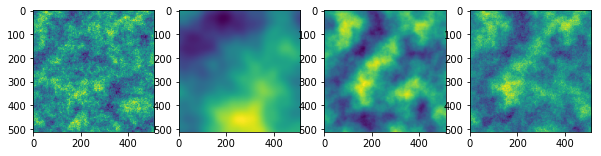

In [42]:
# sampler.initNoise(frequency=0.021, octaves=6, lacunarity=2.1, gain=0.45)
xv = np.linspace(-1, 1, 512)*100
yv = np.linspace(-1, 1, 512)*100
zv = np.array(np.arange(0, 2))

n1 = sampler.initNoise(frequency=0.002, octaves=6, lacunarity=2.1, gain=0.8)
img_n1 = sampler.generate_ndNoise(n1, 1 + xv*10, yv*10, zv)[:,:,0]

n2 = sampler.initNoise(frequency=0.001, octaves=6, lacunarity=2.1, gain=0.45)
img_n2 = sampler.generate_ndNoise(n2, xv, yv, zv)[:,:,0]
img_n2 = 1 / (1 + np.exp(-img_n2))

n3 = sampler.initNoise(frequency=0.02, octaves=6, lacunarity=2.1, gain=0.45)
img_n3 = sampler.generate_ndNoise(n3, xv, yv, zv)[:,:,0]

img_n = (img_n1 * img_n2) + (img_n3 * (1 - img_n2))

fig, ax = plt.subplots(1, 4)
ax[0].imshow(img_n1)
ax[1].imshow(img_n2)
ax[2].imshow(img_n3)
ax[3].imshow(img_n)


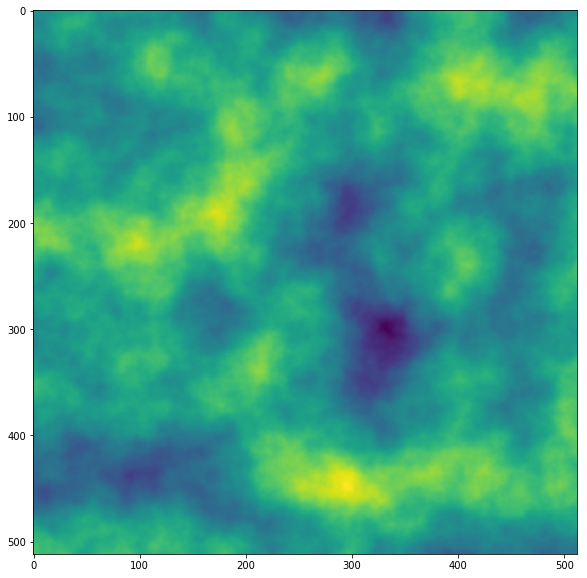

In [11]:
n3.frequency = 0.022
img_n3 = sampler.generate_ndNoise(n3, xv, yv, zv)[:,:,0]
plt.imshow(img_n3)

## Reinit

[ -1.74615694   5.30025021  -9.07488415   9.63898147  -9.67763138
 -10.16316144 -12.55377996  12.57887245 -14.92511058 -17.82663207
 -20.83178906  20.9710676   21.25242716  23.19447345 -44.98874752
  57.20526092]


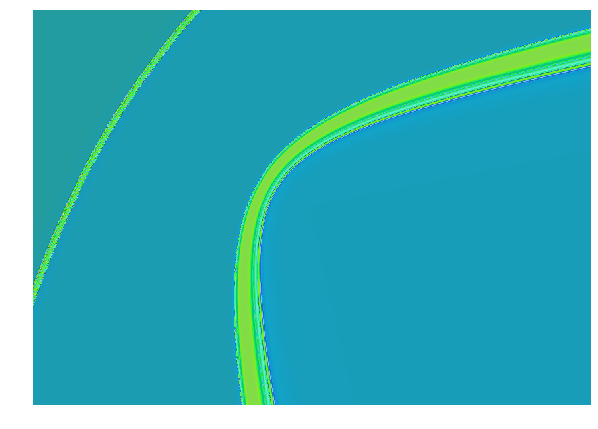

In [19]:
# %%timeit
sampler.reinit()  

##################
# x_dim = width
# y_dim = height

x_dim = 420*2
y_dim = 297*2
# im2 = np.zeros((x_dim, y_dim))
im2 = None

scale = 4

z2 = sampler.generate_z()[0]
z_scale = 100
z_factor = np.random.normal(size=16) * z_scale

sortidx = np.argsort(np.abs(z_factor))
sortidy = np.argsort(np.abs(z2[0]))

z_factor = z_factor[sortidx]
z2 = z2[sortidy]
zz = z2 * z_factor 
print(zz)
##################

##################
# pseed = 0
pseed = int(np.random.random() * 1e5 )
perlin_params = (0, scale/2, 6, 0.5, 2.0)
f_params = [2, 0, perlin_params, 0, 0]
methods = ['rgb', 'hsv', 'xyz', 'yuv', 'YPbPr', 'YCbCr', 'YDbDr']
method_i = 0
#################

img_data = sampler.generate(zz, x_dim=x_dim, y_dim=y_dim, scale=scale, seed=pseed,
                            f_params=f_params, img=im2)

sampler.show_image(img_data, methods[method_i])



## Output Weights

In [15]:
num_input_layers = 8  ## 1 for z, 3 for coordinates, 4 for extra functions. These layers have no biases
evaled = [var.eval(session=sampler.cppn.sess) for var in tf.get_default_graph().get_collection('trainable_variables')]

def tanh_activation(x):
    x = tf.nn.tanh(x)
    
    return x

def sigmoid_activation(x):
    x = tf.nn.signmoid
    
    return x 

grouped = []
pos_list = np.concatenate((np.arange(0, num_input_layers), np.arange(num_input_layers, len(evaled), 2)))
for pos in pos_list:
    
    if pos != len(evaled):
        activation_fn = tanh_activation
    else:
        activation_fn = sigmoid_activation
    
    if pos >= num_input_layers and pos < (len(evaled) - 1):
        bias = evaled[pos+1][0,:]
    else:
        bias = np.array(0)
        
    grouped.append({'weights': evaled[pos], 
                   'bias': bias,
                    'activation': activation_fn
                   })

In [11]:
pos_list

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 12, 14, 16, 18])

# Translate into GLSL

## Translate function

In [17]:
[g['bias'].shape for g in grouped if g['bias'].shape]

[(32,), (128,), (64,), (16,), (16,)]

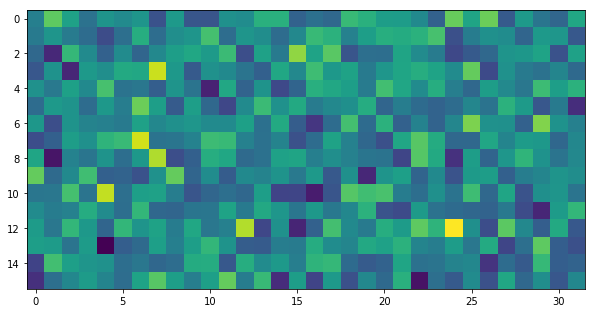

In [421]:
plt.imshow(grouped[0]['weights'])

In [605]:
evaled[13].shape

(1, 32)

In [17]:
import numpy as np

def cppn_to_glsl(layers, num_input_layers, clip=(-10, 10), fn_name="cppn_fn", mode="td", verbose=False,
                fix_aspect=True):
    '''
    Given a list of dicts defining layers of a trained CPPN (as returned by the above `eval_model` function) 
    generate GLSL code.
    
    The `mode` parameter can be one of the following:
    "shadertoy":
        Exports code compatible with the ShaderToy editor at http://shadertoy.com
    "bookofshaders":
        Exports code compatible with the Book Of Shaders editor here http://editor.thebookofshaders.com/
    "td":
        Exports code compatible with TouchDesigner: can be dropped into a "GLSL TOP"
        (see https://docs.derivative.ca/GLSL_TOP). TouchDesigner can be found at http://derivative.ca
    '''
    
    # HARD CODED CLIPPING VALUES (SINA)
    clip_min = clip[0]
    clip_max = clip[1]
    
    # the xy2rgb cppn's internal size is the output of its first layer (pre-activation)
    # so will just inspect that to figure it out
#     n_hidden = layers[0]['weights'].shape[-1]
    n_hidden = np.max([d['weights'].shape[-1] for d in grouped])
    if n_hidden%4 != 0:
        raise ValueError("Currently only support multiples of 4 for hidden layer size")
    modes = {"shadertoy", "bookofshaders", "td"}
    if mode not in modes:
        raise ValueError(f"Mode {mode} not one of the supported modes: {modes}")
        
    if mode == "bookofshaders":
        snippet =f"""
#ifdef GL_ES
precision lowp float;
#endif

uniform vec2 u_resolution;
uniform vec2 u_mouse;
uniform float u_time;

"""
    elif mode == "shadertoy":
        snippet = ""
    elif mode == "td":
        snippet = f"""
// music interaction inputs
uniform vec4 uIn0;
uniform vec4 uIn1;
uniform vec4 uIn2;
uniform vec4 uIn3;

// latent factor controls
uniform vec4 scale;
uniform vec2 Zscale;
uniform mat4 Zin;

// activation function controls
uniform vec2 clip_lim;  // clip values after activation


uniform vec4 h_music; // music interaction with hidden layers
uniform vec4 c_music; // music interaction with colours

uniform vec4 fParams; // amplitude of extra input functions

out vec4 fragColor;
        """
    
    snippet += f"""
#define N_HIDDEN {n_hidden}
#define M_PI 3.1415926535897932384626433832795

vec4 bufA[N_HIDDEN/4];
vec4 bufB[N_HIDDEN/4];



vec4 {fn_name}(vec2 coordinate, vec4 scale, vec2 Zscale, mat4 Zin, mat4 InSamp, vec4 fParams, vec2 clip_lim, vec4 in0, vec4 in1, vec4 in2, vec4 in3, vec4 h_music, vec4 c_music) {{
    coordinate.xy = scale[0]*coordinate.xy;
    float r = sqrt(coordinate.x*coordinate.x + coordinate.y*coordinate.y);
    mat4 Zvec = Zscale.x * mat4(in0, in1, in2, in3) + Zscale.y * Zin;
    vec4 tmp;
    // bufB[0] = vec4(coordinate.x, coordinate.y, r, 0.);
    
"""
    def vec(a):
        '''Take a Python array of length four (or less) and output code for
        a GLSL vec4, possibly zero-padded at the end'''
        if len(a) == 4:
            return f"vec4({','.join(str(x) for x in a)})"
        else:
            assert len(a) < 4 , "Length must less than 4"
            return vec(np.concatenate([a, [0.]*(4-len(a))]))
    
    def mat(a):
        '''Tak a numpy matrix of 4 rows and 4 or fewer columns, and output GLSL code
        for a mat4, possibly with zeros padded in the final columns'''
        if a.shape[0] < 4:
            m2 = np.vstack([a, [[0.,0.,0.,0.]] * (4 - a.shape[0])])
            return mat(m2)
        assert a.shape[0] == 4, f"Expected a of shape (4,n<=4). Got: {a.shape}."
        return f"mat4({','.join(vec(row) for row in a)})"
    
    for layer_i, layer_dict in enumerate(layers):
        weight = layer_dict['weights']
        bias = layer_dict['bias']
        activation = layer_dict['activation']
        
        from_size, to_size = weight.shape
        if verbose:
            print(f"Processing layer {layer_i}. from_size={from_size}, to_size={to_size}")
        
        ## Set inputs 
        if layer_i == 0: snippet += f"\n// Latent Vector Inputs \n"
        elif layer_i == 1:
            snippet += f"\n// INPUT1 \n"
            snippet += f"tmp = vec4(coordinate.x, 0., 0., 0.);\n"
        elif layer_i == 2:
            snippet += f"\n// INPUT2 \n"
            snippet += f"tmp = vec4(coordinate.y, 0., 0., 0.);\n"
        elif layer_i == 3:
            snippet += f"\n// INPUT3 \n"
            snippet += f"tmp = vec4(r, 0., 0., 0.);\n"
        elif layer_i == 4:
            snippet += f"\n// INPUT4 \n"
            snippet += f"tmp = InSamp[0] * fParams[0];\n"
        elif layer_i == 5:
            snippet += f"\n// INPUT5 \n"
            snippet += f"tmp = InSamp[1] * fParams[1];\n"
        elif layer_i == 6:
            snippet += f"\n// INPUT6 \n"
            snippet += f"tmp = InSamp[2] * fParams[2];\n"
        elif layer_i == 7:
            snippet += f"\n// INPUT7 \n"
            snippet += f"tmp = InSamp[3] * fParams[3];\n"
            snippet += f"tmp = vec4(cos(coordinate.x * scale[3]) + sin(coordinate.y * scale[3] + M_PI/2), 0., 0., 0.) * fParams[3];\n"    
        
        # First, compute the transformation from the last layer into bufA
        for to_index in range(max(1,to_size//4)):
            #Again, the max(1) is important here, because to_size is 3 for the last layer!
            if verbose: print(f"  generating output {to_index} into bufA")
            
            ##### DEALING WITH INPUT LAYERS ######
            if layer_i < num_input_layers:
                # I have multiple input layers and they don't have biases
                # Furthermore, each input goes through its own layer before being added up
                snippet += f"\nbufA[{to_index}] = vec4(0., 0., 0., 0.)"
                if layer_i == 0:
                # this is for the latent vector Z which is of size 16 (mat4)                  
                    for from_index in range(max(1, from_size//4)):
                        snippet += f" + {mat(weight[from_index*4:from_index*4+4, to_index*4:to_index*4+4])} * Zvec[{from_index}]"
                else:                        
                    for from_index in range(max(1, from_size//4)):
                        snippet += f" + {mat(weight[from_index*4:from_index*4+4, to_index*4:to_index*4+4])} * tmp"    
    #                     if verbose: print(f"        {weight[from_index*4:from_index*4+4, to_index*4:to_index*4+4].shape}")
                        
            #################
            
            else:    
                if not bias.shape:
                    snippet += f"\nbufA[{to_index}] = vec4(0., 0., 0., 0.)"
                else:
                    snippet += f"\nbufA[{to_index}] = {vec(bias[to_index*4:to_index*4+4])}"
                for from_index in range(from_size//4):
                    # don't apply clipping to the final colour layer
                    if layer_i < (len(layers) - 1):
                        snippet += f" + {mat(np.clip(weight[from_index*4:from_index*4+4, to_index*4:to_index*4+4], clip_min, clip_max))}  * bufB[{from_index}]"
                        if verbose: print(f"   Clipping weight matrix {layer_i}_{from_index*4}-{from_index*4+4}")
                    else:
                        snippet += f" + {mat(weight[from_index*4:from_index*4+4, to_index*4:to_index*4+4])}  * bufB[{from_index}]"
                
#             for from_index in range(max(1,from_size//4)):
#                 # the "max" in the above loop gives us a special case for the first layer,
#                 # where there are only two inputs.
#                 snippet += f" + {mat(weight[from_index*4:from_index*4+4, to_index*4:to_index*4+4])} * bufB[{from_index}]"
            snippet += f";\n"
            
        if to_size != 3:
            if verbose: print("  Doing the activation into bufB ")
            if layer_i >= num_input_layers:
                snippet += f"\n// Activation on neurons in layer {layer_i - num_input_layers + 1}. \n"
            elif layer_i == (num_input_layers - 1):
                snippet += f"\n// Activation on inputs. \n"
            m_index = 0
            for to_index in range(to_size//4):
#                 if activation == composite_activation:
#                     snippet += f"tmp = atan(bufA[{to_index}]);\n"
#                     snippet += f"bufB[{to_index}] = tmp/0.67;\n"
#                     snippet += f"bufB[{to_index + to_size//4}] = (tmp*tmp) / 0.6;\n"
#                 elif activation == composite_activation_unbiased:
#                     snippet += f"tmp = atan(bufA[{to_index}]);\n"
#                     snippet += f"bufB[{to_index}] = tmp/0.67;\n"
#                     snippet += f"bufB[{to_index + to_size//4}] = (tmp*tmp - 0.45) / 0.396;\n"
#                     # return tf.concat([x/0.67, (x*x-0.45)/0.396], -1)
#                 elif activation == periodic_activation:
#                     snippet += f"bufB[{to_index}] = sin(bufA[{to_index}]);\n"
#                     snippet += f"bufB[{to_index + to_size//4}] = cos(bufA[{to_index}]);\n"
#                 elif activation == modulo_activation:
#                     snippet += f"bufB[{to_index}] = mod(bufA[{to_index}], 2.0);\n"
#                     snippet += f"bufB[{to_index + to_size//4}] = mod(bufA[{to_index}]+1.0, 2.0);\n"
#                 elif activation == modsin_activation:
#                     snippet += f"bufB[{to_index}] = mod(bufA[{to_index}], 2.0*3.14159) / (2.0*3.14159) - 0.5;\n"
#                     snippet += f"bufB[{to_index + to_size//4}] = sin(bufA[{to_index}]) / 0.5;\n"
#     #                return tf.concat([tf.mod(x, 2.0*3.14159)/(2.0*3.14159)-0.5, tf.sin(x)/0.5], -1)

#                 elif activation == relu_normalized:
#                     snippet += f"bufB[{to_index}] = (max(bufA[{to_index}], 0.) - 0.4 / 0.58);\n"
#                     snippet += f"bufB[{to_index + to_size//4}] = (max(-bufA[{to_index}], 0.) - 0.4 / 0.58);\n"
                
                if activation == tanh_activation:
                    # first sum input layers, then apply activation function
                    if layer_i < (num_input_layers - 1):
                        snippet += f"bufB[{to_index}] = bufB[{to_index}] + bufA[{to_index}];\n"
                    elif layer_i == (num_input_layers - 1):
                        if m_index > 3:
                            m_index = 0
                        snippet += f"tmp = (bufB[{to_index}] + bufA[{to_index}]) * h_music[{m_index}];\n"
#                         snippet += f"tmp = tmp*tmp*tmp;\n"
                        snippet += f"bufB[{to_index}] = tanh(tmp);\n"
                        m_index += 1
                    else:
#                         if layer_i == (num_input_layers + 1):
#                             musical interaction with the first hidden layer
#                             snippet += f"tmp = bufA[{to_index}] * h_music[{to_index}];\n"
#                         elif layer_i == (num_input_layers + 2):
#                             # musical interaction with the first hidden layer
#                             snippet += f"tmp = bufA[{to_index}] * h_music[1];\n"
#                         elif layer_i == (num_input_layers + 3):
#                             # musical interaction with the first hidden layer
#                             snippet += f"tmp = bufA[{to_index}] * h_music[2];\n"
#                         elif layer_i == (num_input_layers + 4):
#                             # musical interaction with the first hidden layer
#                             snippet += f"tmp = bufA[{to_index}] * h_music[3];\n"
#                         else:
                        snippet += f"tmp = bufA[{to_index}];\n"
                        snippet += f"tmp = clamp(tmp, clip_lim[0], clip_lim[1]);\n"
                        snippet += f"tmp = tmp*tmp*tmp;\n"
                        snippet += f"bufB[{to_index}] = tanh(tmp);\n"
                    
                elif activation == sigmoid_activation:
                    snippet += f"bufB[{to_index}] = 1./(1. + exp2(-bufA[{to_index}] * c_music));\n"
                    

                    #return (x-0.40)/0.58
                    # return tf.concat([(x-0.40)/0.58, (xx-0.40)/0.58], -1)
                else:
                    raise ValueError(f"Unknown activation: {activation.__name__}")
        else:
            if verbose:
                print("  Sigmoiding the last layer")
            # We just do a sigmoid at the last layer.
            sigmoider = lambda s: f"1. / (1. + exp(-{s}))"
            snippet += f"return vec4(({sigmoider('bufA[0] * c_music')}).xyz, 1.0);\n"
    snippet += "}\n"
    if mode=="bookofshaders":
        snippet += f"""
void main() {{
    vec2 st = gl_FragCoord.xy/u_resolution.xy;
"""
        if fix_aspect:
            snippet += f"""
    st.x *= u_resolution.x/u_resolution.y;
    st.x -= ((u_resolution.x / u_resolution.y) - 1.) /2.;
"""
        snippet += f"""
    st = vec2(1., -1.) * 2. * (st - vec2(0.5, 0.5));

    gl_FragColor = {fn_name}(st, sin(u_time), sin(2.*u_time), sin(3.*u_time), sin(4.*u_time));
}}
"""
    elif mode == "shadertoy":
        snippet += f"""
void mainImage( out vec4 fragColor, in vec2 fragCoord ) {{
    // Normalized pixel coordinates (from 0 to 1)
    vec2 uv = fragCoord/iResolution.xy;
    vec2 mouseNorm = (iMouse.xy / iResolution.xy) - vec2(0.5, 0.5);

"""
        if fix_aspect:
            snippet += f"""
    uv.x *= iResolution.x / iResolution.y;
    uv.x -= ((iResolution.x / iResolution.y) - 1.) /2.;
"""
        snippet += f"""

    // Shifted to the form expected by the CPPN
    uv = vec2(1., -1.) * 2. * (uv - vec2(0.5, 0.5));
    // Output to screen
    fragColor = {fn_name}(uv, sin(iTime), sin(2.*iTime), sin(3.*iTime), sin(4.*iTime));
}}
        """
    elif mode == "td":
        snippet += f"""
void main() {{

    // derive aspect from inputs
    vec2 aspect = uTD2DInfos[0].res.zw / uTD2DInfos[0].res.w ; 
    // Normalized pixel coordinates (from 0 to 1)
    vec2 uv = vUV.xy;

    // sample texture
    mat4 InSamp = mat4(texture(sTD2DInputs[0], uv), texture(sTD2DInputs[1], uv), texture(sTD2DInputs[2], uv), vec4(0., 0., 0., 0.));
    
    // correct for aspect
    // uv = uv * aspect;
    
    // Shifted to the form expected by the CPPN
    uv.xy = vec2(1280./720., 720./720.) * vec2(1., -1.) * 2. * (uv.xy - vec2(0.5, 0.5));
    
    // Output to screen
    fragColor = TDOutputSwizzle({fn_name}(uv.xy, scale, Zscale, Zin, InSamp, fParams, clip_lim, uIn0, uIn1, uIn2, uIn3, h_music, c_music));
}}
        """
    return snippet

## Translate

In [18]:
print(cppn_to_glsl(grouped, num_input_layers, clip=(-0.4, 0.4), mode="td", verbose=True, fix_aspect=True), file=open('td_glsl_log.txt', 'w'))

Processing layer 0. from_size=16, to_size=32
  generating output 0 into bufA
  generating output 1 into bufA
  generating output 2 into bufA
  generating output 3 into bufA
  generating output 4 into bufA
  generating output 5 into bufA
  generating output 6 into bufA
  generating output 7 into bufA
  Doing the activation into bufB 
Processing layer 1. from_size=1, to_size=32
  generating output 0 into bufA
  generating output 1 into bufA
  generating output 2 into bufA
  generating output 3 into bufA
  generating output 4 into bufA
  generating output 5 into bufA
  generating output 6 into bufA
  generating output 7 into bufA
  Doing the activation into bufB 
Processing layer 2. from_size=1, to_size=32
  generating output 0 into bufA
  generating output 1 into bufA
  generating output 2 into bufA
  generating output 3 into bufA
  generating output 4 into bufA
  generating output 5 into bufA
  generating output 6 into bufA
  generating output 7 into bufA
  Doing the activation into buf

# Sampling

## unsorted

In [ ]:
sampler.reinit()  
i_r = 0
##################
x_dim = 512
y_dim = 512
scale = 1
if i_r == 0:
    img = np.zeros((x_dim, y_dim))
#     img = im2
#     x, y = np.meshgrid(np.linspace(-scale, scale, x_dim), np.linspace(-scale, scale, y_dim))
#     img = np.random.random()*x + np.random.random()*y + np.random.random()*np.sqrt(x**2 + y**2)
#     img = np.random.random((x_dim, y_dim))
mu = 1  # image evolution rate
##################

z2 = sampler.generate_z()[0]
z_scale = 0
z_factor = np.random.normal(size=16) * z_scale

sortidx = np.argsort(np.abs(z_factor))
sortidy = np.argsort(np.abs(z2[0]))

z_factor = z_factor[sortidx]
z2 = z2[sortidy]
zz = z2 * z_factor 
print(zz)
##################

##################
pseed = 0
# pseed = int(np.random.random() * 1e5 )
perlin_params = (5, 1, 6, 0.5, 2.0)
f_params = [1, 0, perlin_params, 0, mu]
methods = ['rgb', 'hsv', 'xyz', 'yuv', 'YPbPr', 'YCbCr', 'YDbDr']
method_i = 0
##################

img_data = sampler.generate(zz, x_dim=512, y_dim=512, scale=scale, seed=pseed,
                            f_params=f_params, img=img)
# img = img + mu * np.mean(img_data, axis=2).reshape(512, 512)
img = (img + np.mean(img_data, axis=2).reshape(512, 512)) / 2
i_r += 1

sampler.show_image(img_data, methods[method_i])
plt.imshow(img)
plt.colorbar()
img.max()

In [ ]:
x, y = np.meshgrid(np.linspace(-scale, scale, x_dim), np.linspace(-scale, scale, y_dim))
img = np.random.random()*x + np.random.random()*y + np.random.random()*np.sqrt(x**2 + y**2)
mu = 0.05
sampler.save_recursive_anim_png_seq(zz, img, img_evo=mu, n_frame=100, 
                            x_dim=x_dim, y_dim=y_dim, scale=scale, f_params=f_params)

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3)


z2 = sampler.generate_z()[0]
img = None
z_scale = 0
z_factor = np.random.normal(size=16) * z_scale
sortidx = np.argsort(np.abs(z_factor))
sortidy = np.argsort(np.abs(z2[0]))
z_factor = z_factor[sortidx]
z2 = z2[sortidy]
zz = z2 * z_factor    # 
f_params = [5, 0, 0, 0, 0]

for ax in axes.flat:
    sampler.reinit()
    img_data = sampler.generate(zz, x_dim = 512, y_dim = 512, scale = 0.01,
                                f_params=f_params, img=img)
    
    ax.set_aspect('equal')
    ax.imshow(img_data)
#     fig.patch.set_visible(False)
    ax.axis('off')
    
plt.tight_layout()
plt.show()

In [ ]:
# z2 = [0, 0, 0.1, 0.1, 0, 0, 0, 0]
z3 = sampler.generate_z()
img = None

low = np.random.random()
mid = np.random.random()
high = np.random.random()

C = np.random.uniform()
zz2 = np.concatenate((C + low * z3[0:4], mid * z3[4:12], high * z3[12:16]))
# f_params = [2, 0.2, 0, 0, 0]

img_data = sampler.generate(zz2, x_dim = 512, y_dim = 512, scale = 10, 
                            f_params=f_params, img=img)
sampler.show_image(img_data)
# plt.imshow(img_data)

## Hires

Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 
Preparing image section 


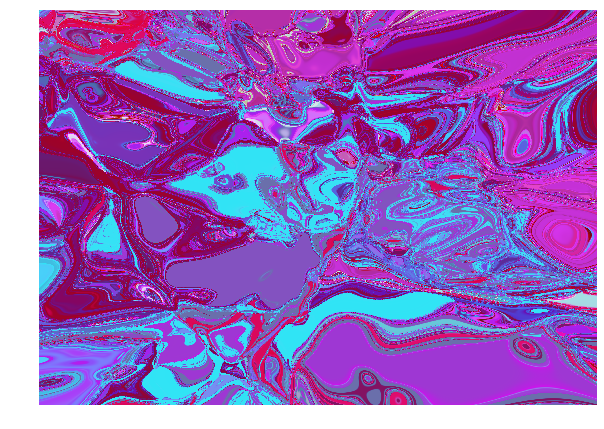

In [11]:
img_data = sampler.generate_hires([zz], res=30, x_res_factor=140, y_res_factor=99, 
                                  seed=pseed, scale=scale, f_params=f_params, img=None)

# img_data = sampler.generate_hires([zz], res=512, x_res_factor=10, y_res_factor=10, 
#                                   seed=pseed, scale=scale, f_params=f_params, img=None)
sampler.show_image(img_data)
# plt.imshow(img_data)
time = datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
folder = 'save/hi_res/'
if not path.exists(folder):
    makedirs(folder)
figname = folder + time + '.png'
# sampler.save_png(img_data, figname)
# img_data = rgba2rgb(img_data)
# img_data = hsv2rgb(img_data)
# img_data = xyz2rgb(img_data)
imageio.imwrite(figname, (img_data * 255).astype(np.uint8), format='png')

In [ ]:
sampler.save_hires_png_seq([zz], 0.07, n_frame=300, res=80, x_res_factor=16, y_res_factor=9,
                           scale=1, seed=pseed, f_params=f_params, img=None, method='rgb')

In [ ]:
x = sampler.generate(z1, x_dim=512, y_dim=512)
import matplotlib.pyplot as plt
plt.hist(x.reshape(1, x.size))

In [ ]:
# z1 = sampler.generate_z()
z2 = sampler.generate_z()
img_data = sampler.generate(z2, x_dim=640, y_dim=640, scale=10, 
                                    f_params=f_params, img=img)
sampler.show_image(img_data)
# plt.imshow(img_data)



In [ ]:
sampler.show_image(sampler.generate(z1, x_dim=1080, y_dim=1080, f_params=f_params))

In [ ]:
time = datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
figname = 'save/' + time + '.gif'
z1 = np.array(z1)
z2 = np.array(z2)
sampler.save_anim_gif(z1, z2, figname, 
                      x_dim = 640, y_dim = 640, scale=5, f_params=f_params, 
                      n_frame=240, reverse=False, img=img)

In [ ]:
time = datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
figname = 'save/' + time + '.gif'
# z1 = np.array(z1)
sampler.save_wave_anim_gif(zz, 0.025, figname, 
                      x_dim = 640, y_dim = 640, scale=10, f_params=f_params, 
                      n_frame=240, reverse=False, img=None)

In [ ]:
time = datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
figname = 'save/' + time + '.gif'
# z1 = np.array(z1)
sampler.save_wave_anim_gif(zz, 0.01, figname, 
                      x_dim = 640, y_dim = 640, scale=0.1, f_params=f_params, 
                      n_frame=680, reverse=False, img=None, method='rgba')

In [ ]:
time = datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
figname = 'save/' + time + '.gif'
# z1 = np.array(z1)
sampler.save_wave_cat_anim_gif(z1=zz[0], r_global=0.1, filename=figname, 
                      x_dim = 640, y_dim = 640, scale=1.5, f_params=f_params, 
                      n_frame=360, reverse=False, img=None)

In [78]:
audiopath = 'audio/still.mp3'
start_frame = 0

acceleration = False
exp_gain = 2.5
w_scaler = 1
f_amp_w = True
normalize_w = False


time = datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
figname = 'save/audio_png/' + time
sampler.save_music_anim_gif(zz, r_global=1, audiopath=audiopath, filename=figname,
                            x_dim=x_dim, y_dim=y_dim, scale=scale, f_params=f_params,
                            n_frame=600, start_frame=start_frame, img=im2,
                            acceleration=acceleration, 
                            exp_gain=exp_gain, w_scaler=w_scaler,
                            normalize_w=normalize_w, 
                            f_amp_w=f_amp_w)

processing image  0
processing image  1
processing image  2
processing image  3
processing image  4
processing image  5
processing image  6
processing image  7
processing image  8
processing image  9
processing image  10
processing image  11
processing image  12
processing image  13
processing image  14
processing image  15
processing image  16
processing image  17
processing image  18
processing image  19
processing image  20
processing image  21
processing image  22
processing image  23
processing image  24
processing image  25
processing image  26
processing image  27
processing image  28
processing image  29
processing image  30
processing image  31
processing image  32
processing image  33
processing image  34
processing image  35
processing image  36
processing image  37
processing image  38
processing image  39
processing image  40
processing image  41
processing image  42
processing image  43
processing image  44
processing image  45
processing image  46
processing image  47
pr

In [21]:
audiopath = 'audio/irani_dialog.mp3'
sound, fs = sampler.load_sound(audiopath)
amp = sampler.generate_amp(sound, fs, 30)
amp = sampler.smooth_amps(amp, a=0.9)
# amp_sums = np.sum(amp, 0)
# amp = (amp) / amp_sums  # normalize to add to 2*pi for each band so gif loops
# freq = [1, 2, 3, 4, 5, 7, 10, 12]
# rand_freq1 = sample(freq, len(freq))
# # rand_freq1 = sample(freq, len(freq))
# amp = rand_freq1 * np.tile(2 * np.pi, amp.shape[1]) * amp

In [22]:
amp.shape

(12392, 8)

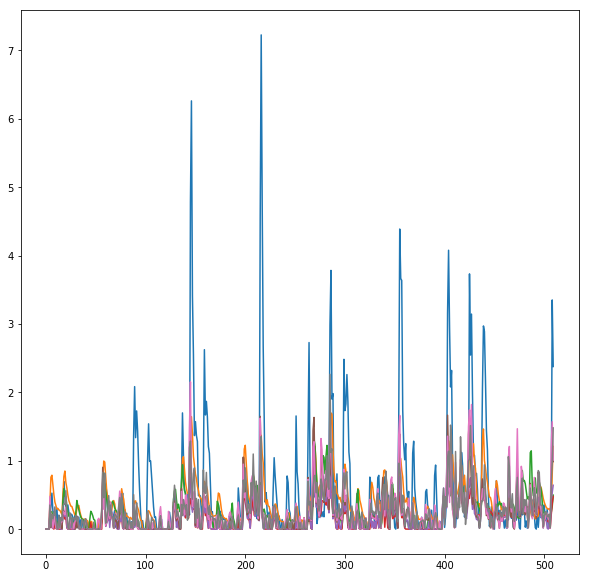

In [29]:
plt.plot(amp[290:800])

In [ ]:
audiopath = 'high.mp3'
sound, fs = sampler.load_sound(audiopath)
amp = sampler.generate_amp(sound, fs, 30)
theta1,theta2 = sampler.calculate_force_thetas(amp)

r1, r2 = 1, 1
delta_z1 = r1 * np.sin(theta1) - r1/2
delta_z2 = r2 * np.cos(theta2) - r2/2

plt.plot(np.diff(theta1, 0))

In [ ]:
from os import path, makedirs
z_zoom = zz
num_frames = 540
res = 512
r_global = 0.005
w_scaler = 1
exp_gain = 1
acceleration = False
audiopath = 'mozart25_short.mp3'

start_scale = 0.5
end_scale = 10

def calculate_delta_z(sampler, z1, r_global, audiopath, n_frame=10, 
                      start_scale, end_scale,
                      acceleration=False, exp_gain=1, fps=30, w_scaler=2):
    total_frames = n_frame
    fps = fps
    sound, fs = sampler.load_sound(audiopath)
    amp = sampler.generate_amp(sound, fs, fps)[0:total_frames]

    z1 = z1[0]
    r = z1 / np.max(np.abs(z1))
    r = r * r_global

    #  CALCULATE delta_z
    if acceleration:
        gamma = 20  # damping constant
        thresh = 20  # threshold audio
        num_pad = 3  #  number of padding elements (zeros) to re-align delta_theta with beats

        theta1, theta2 = sampler.calculate_force_thetas(amp=amp, exp_gain=exp_gain, gamma=gamma, w_scaler=w_scaler,
                                                        num_pad=num_pad, thresh=thresh)
        total_frames += num_pad
    else:
        theta1, theta2 = sampler.calculate_thetas(amp=amp, exp_gain=exp_gain, w_scaler=w_scaler)

    delta_z1 = np.sin(theta1)
    delta_z2 = np.cos(theta2)
    
    scale = 10 ** \
        (-1 * np.linspace(-np.log10(start_scale), -np.log10(end_scale), num_frames_new)

    delta_z = []
    for i in range(delta_z1.shape[0]):
        delta_z.append(np.stack([x for t in zip(delta_z1[i, :], delta_z2[i, :]) for x in t]))
    delta_z = np.stack(delta_z)
    delta_z = np.multiply(r, delta_z) - r / 2
    delta_z = np.multiply(delta_z, scale)

    return delta_z

delta_z = calculate_delta_z(sampler=sampler, z1=z_zoom, r_global=r_global, 
                            audiopath=audiopath, n_frames=num_frames, 
                            start_scale=start_scale, end_scale=end_scale)
# delta_z = sampler.calculate_delta_z(z_zoom, r_global, audiopath, num_frames)

num_frames_new = delta_z.shape[0]
# scale = 10 ** \
#         (-1 * np.linspace(-np.log10(start_scale), -np.log10(end_scale), num_frames_new))

time = datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
folder = 'save/zoom_anim/' + time
if not path.exists(time):
    makedirs(folder)

for i in range(num_frames_new):
    z_new = z_zoom + delta_z[i, :]

    img_data = sampler.generate(z_new, x_dim=res, y_dim=res, scale=scale[i],
                                f_params=f_params, img=img)
    print('processing image ', i)

    figname = folder + '/' + time + '-' + str(i).zfill(4) + '.png'
    imageio.imwrite(figname, (img_data * 255).astype(np.uint8), format='png')


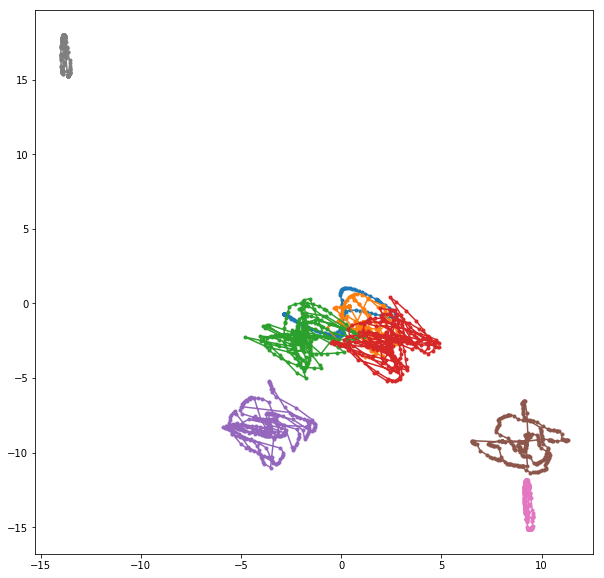

In [77]:
# audiopath = 'audio/still.mp3'
# sound, fs = sampler.load_sound(audiopath)

z2 = sampler.generate_z()[0]
z_scale = 15
z_factor = np.random.normal(size=16) * z_scale

sortidx = np.argsort(np.abs(z_factor))
sortidy = np.argsort(np.abs(z2[0]))

z_factor = z_factor[sortidx]
z2 = z2[sortidy]
zz = z2 * z_factor 

r_global = 1
n_frame = 300
acceleration = False
exp_gain = 2.5
fps = 30
w_scaler = 2
normalize_w = False
f_amp_w = True
start_frame = 0

delta_z1 = sampler.calculate_delta_z(zz, 1, audiopath, n_frame, start_frame,
                                    acceleration, exp_gain, fps, w_scaler, normalize_w, f_amp_w)

delta_z2 = sampler.calculate_delta_z(zz, 1, audiopath, n_frame, start_frame,
                                    acceleration=False, exp_gain=0.5, fps=30, w_scaler=2, normalize_w=False, f_amp_w=False)

delta_z = delta_z1 * delta_z2


for i in range(0, 16, 2):
    dz1, dz2 = (zz[i] + delta_z[:, i], zz[i+1] + delta_z[:, i + 1])
    plt.plot(dz1, dz2, '.-')

In [52]:
zz

array([-0.,  0.,  0.,  0., -0., -0.,  0., -0., -0.,  0.,  0.,  0., -0.,
        0., -0., -0.])

In [ ]:
# import scipy.ndimage
img_path = '/home/skhajehabdollahi/Documents/cppn-tensorflow-master/anna_square.jpeg'
im1 = Image.open(img_path).convert('L')


width = 512
height = 512

im2 = im1.resize((width, height), Image.ANTIALIAS) 

im2 = scipy.ndimage.filters.gaussian_filter(im2, 5)


plt.imshow(im2, cmap='gray')


In [5]:
from noise import pnoise3

In [12]:
from noise import pnoise2 
sampler.initNoise(frequency=0.021, octaves=6, lacunarity=2, gain=0.45)
xv = np.linspace(-1, 1, 512)*100
yv = np.linspace(-1, 1, 512)*100
zv = np.array([0, 1])

img_n = sampler.generate_ndNoise(xv, yv, zv)

######
scale = 10
x_dim = 512
y_dim = 512
perlin_params = (scale, scale/2, 6, 0.5, 2.0)

n_points = x_dim * y_dim
dim_ratio = x_dim / y_dim
x_range = scale * (np.arange(x_dim) - (x_dim - 1) / 2.0) / (x_dim - 1) / 0.5
y_range = scale / dim_ratio * (np.arange(y_dim) - (y_dim - 1) / 2.0) / (y_dim - 1) / 0.5

x_mat = np.matmul(np.ones((y_dim, 1)), x_range.reshape((1, x_dim)))
y_mat = np.matmul(y_range.reshape((y_dim, 1)), np.ones((1, x_dim)))

scale = perlin_params[1]
octaves = int(perlin_params[2])
persistence = perlin_params[3]
lacunarity = perlin_params[4]
xseed = np.random.uniform(-scale, scale)
yseed = np.random.uniform(-scale, scale)
f2 = np.zeros((y_dim, x_dim))
for i in range(len(x_mat[0, :])):
    for j in range(len(y_mat[:, 0])):
        x = x_mat[0, i] + xseed
        y = y_mat[j, 0] + yseed
        f2[j][i] = pnoise2(x / scale,
                           y / scale,
                           octaves=octaves,
                           persistence=persistence,
                           lacunarity=lacunarity,
                           repeatx=x_dim,
                           repeaty=y_dim, base=0)
        
####

fig, ax = plt.subplots(1, 2)
ax0 = ax[0].imshow(img_n[:, :, 0])
ax1 = ax[1].imshow(f2)

fig.colorbar(ax0, ax=ax[0])
fig.colorbar(ax1, ax=ax[1])

AttributeError: 'float' object has no attribute 'shape'